# **EDA**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#import networkx as nx

In [2]:
movies_df = pd.read_csv("Data_ETL/movies_dataset.csv")
movies_df.head(4)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return,lenguaje,Director
0,'Toy Story Collection',30000000.0,'Animation',862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,'Pixar Animation Studios','United States of America',1995-10-30,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sin Dato,Toy Story,7.7,5415.0,1995,12.451801,Inglés,'John Lasseter'
1,'Sin Dato',65000000.0,'Adventure',8844,en,When siblings Judy and Peter discover an encha...,17.015539,'TriStar Pictures','United States of America',1995-12-15,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,4.043035,Inglés,'Larry J. Franco'
2,'Grumpy Old Men Collection',1.0,'Romance',15602,en,A family wedding reignites the ancient feud be...,11.712900,'Warner Bros.','United States of America',1995-12-22,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995,0.000000,Inglés,'Howard Deutch'
3,'Sin Dato',16000000.0,'Comedy',31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,'Twentieth Century Fox Film Corporation','United States of America',1995-12-22,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995,5.090760,Inglés,'Forest Whitaker'


In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45378 entries, 0 to 45377
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  45378 non-null  object 
 1   budget                 45378 non-null  float64
 2   genres                 45378 non-null  object 
 3   id                     45378 non-null  int64  
 4   original_language      45378 non-null  object 
 5   overview               45378 non-null  object 
 6   popularity             45378 non-null  float64
 7   production_companies   45378 non-null  object 
 8   production_countries   45378 non-null  object 
 9   release_date           45378 non-null  object 
 10  revenue                45378 non-null  float64
 11  runtime                45378 non-null  float64
 12  spoken_languages       45378 non-null  object 
 13  status                 45378 non-null  object 
 14  tagline                45378 non-null  object 
 15  ti

In [7]:
genres = movies_df['genres'].value_counts()
genres

genres
 'Drama'              11962
 'Comedy'              8819
 'Action'              4488
 'Documentary'         3402
 'Horror'              2620
Sin Dato               2383
 'Crime'               1685
 'Thriller'            1666
 'Adventure'           1513
 'Romance'             1191
 'Animation'           1121
 'Fantasy'              705
 'Science Fiction'      646
 'Mystery'              552
 'Family'               524
 'Music'                487
 'Western'              451
 'TV Movie'             389
 'War'                  378
 'History'              278
 'Foreign'              118
Name: count, dtype: int64

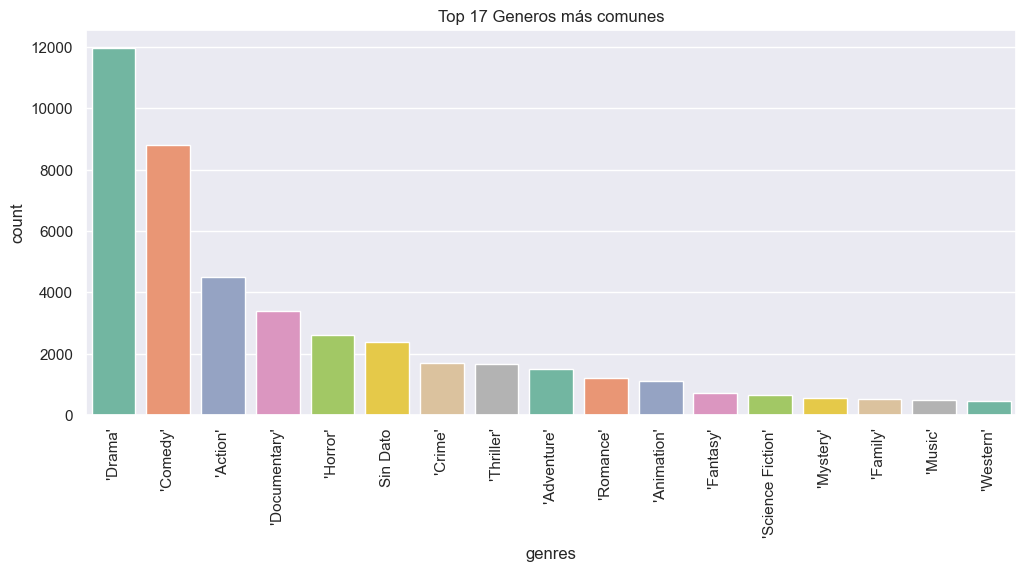

In [5]:
plt.figure(figsize=(12,5))
sns.set(style="darkgrid")
sns.countplot(x='genres', data = movies_df, palette='Set2',order=movies_df['genres'].value_counts().index[0:17])
plt.title('Top 17 Generos más comunes')
plt.xticks(rotation=90);

Observamos que los generos más frecuentes son **Drama**, **Comedy** y **Action**

In [21]:
genres_df = movies_df[['genres', 'revenue']]
genres_df_revenue = genres_df.groupby(by=["genres"]).mean()
genres_df_revenue = genres_df_revenue.sort_values('revenue',ascending=False)[1:20]
genres_df_revenue

,revenue
genres,
'Animation',3.198240e+07
'Fantasy',2.764913e+07
'Action',2.719421e+07
'Science Fiction',2.684695e+07
'Family',2.610369e+07
'Thriller',9.212410e+06
'Comedy',8.600888e+06
'Romance',8.067314e+06
'Crime',8.059616e+06


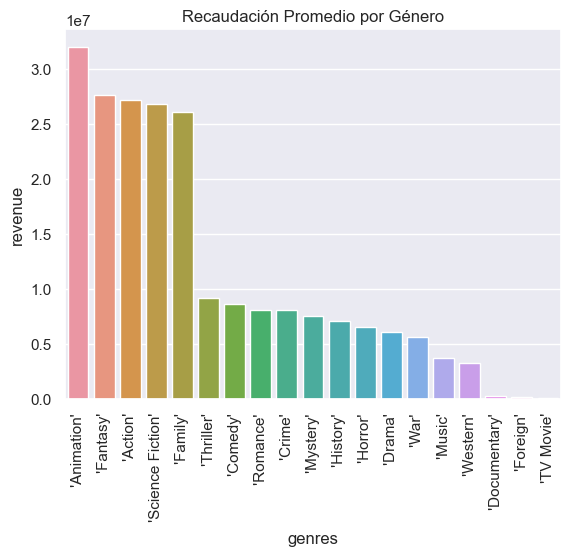

In [30]:
sns.barplot(x = genres_df_revenue.index, y='revenue', data=genres_df_revenue)
plt.title('Recaudación Promedio por Género')
plt.xticks(rotation=90);

El género **Animation**, **Fantasy**, **Action**, **Science Fiction** y **Family** tuvieron mayor recaudación en promedio

In [24]:
genres_df = movies_df[['genres', 'return']]
genres_df_return = genres_df.groupby(by=["genres"]).mean()
genres_df_return = genres_df_return.sort_values('return',ascending=False)[1:20]
genres_df_return

,return
genres,
'Adventure',1.052919e+06
'Romance',9.426388e+05
'Comedy',8.523283e+05
'Family',8.497704e+05
'Action',8.376896e+05
'Mystery',7.620783e+05
'Animation',6.130931e+05
'Music',4.541813e+05
'Drama',4.146780e+05


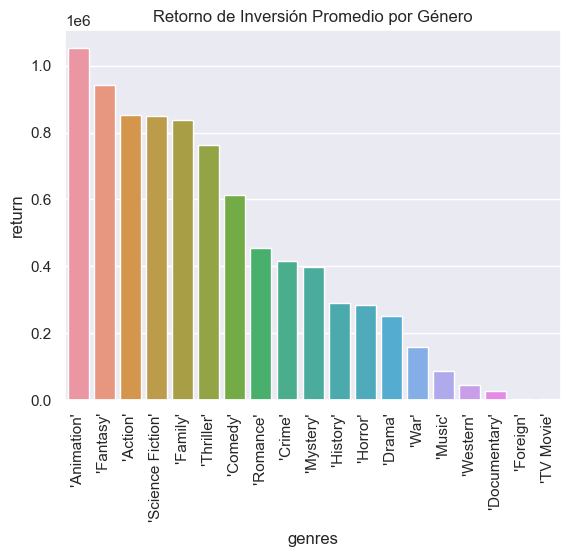

In [27]:
sns.barplot(x = genres_df_revenue.index, y='return', data=genres_df_return)
plt.title('Retorno de Inversión Promedio por Género')
plt.xticks(rotation=90);

### **Análisis por Comapania**

In [32]:
companies_df = movies_df[['production_companies', 'budget']]
companies_df_budget = companies_df.groupby(by=["production_companies"]).sum().sort_values('budget',ascending=False)[1:20]
#companies_df_budget = genres_df_return.sort_values('return',ascending=False)[1:20]
companies_df_budget

,budget
production_companies,
'Universal Pictures',1.397107e+10
'Columbia Pictures',1.267915e+10
'Walt Disney Pictures',1.258714e+10
'Twentieth Century Fox Film Corporation',9.440836e+09
'New Line Cinema',5.857185e+09
'Village Roadshow Pictures',5.495800e+09
'Warner Bros.',3.830899e+09
'DreamWorks SKG',3.736500e+09
'Columbia Pictures Corporation',2.868606e+09


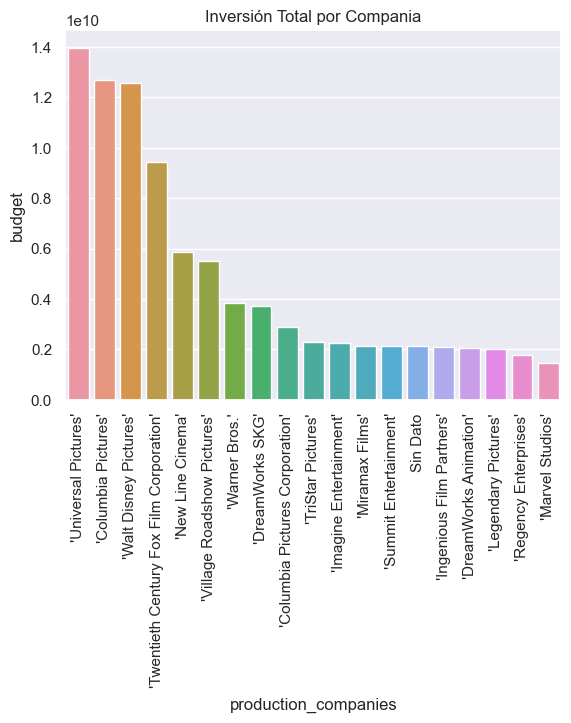

In [33]:
sns.barplot(x = companies_df_budget.index, y='budget', data=companies_df_budget)
plt.title('Inversión Total por Compania')
plt.xticks(rotation=90);

En la gráfica anterior se muestran las companias que han tenido una mayor inversión, siendo estas **Universal Pictures**, **Columbia Pictures**
y **Walt Disney Pictures**

In [34]:
companies_df = movies_df[['production_companies', 'revenue']]
companies_df_revenue = companies_df.groupby(by=["production_companies"]).sum().sort_values('revenue',ascending=False)[1:20]
companies_df_revenue

,revenue
production_companies,
'Universal Pictures',4.585092e+10
'Walt Disney Pictures',3.978121e+10
'Columbia Pictures',3.190780e+10
'Twentieth Century Fox Film Corporation',3.118277e+10
'New Line Cinema',1.606406e+10
'Village Roadshow Pictures',1.261240e+10
'Warner Bros.',1.227406e+10
'DreamWorks SKG',1.115435e+10
'Lucasfilm',9.898421e+09


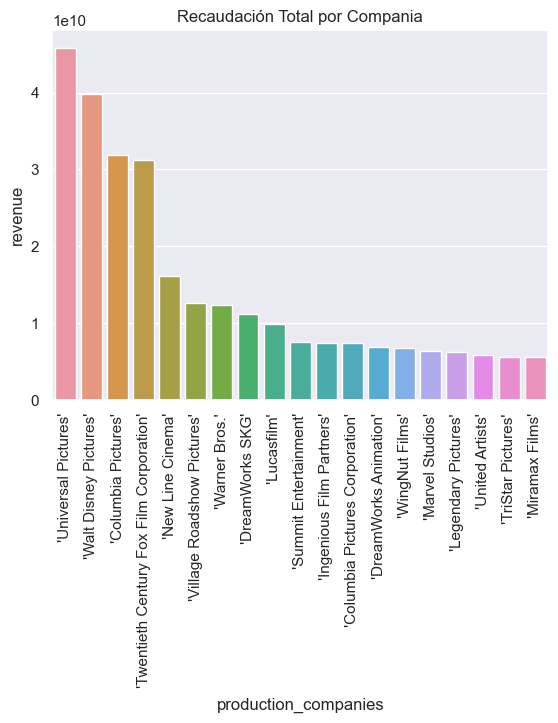

In [35]:
sns.barplot(x = companies_df_revenue.index, y='revenue', data=companies_df_revenue)
plt.title('Recaudación Total por Compania')
plt.xticks(rotation=90);

Aqui podemos ver que las mismas tres companias que han invertido más tanbién han recaudado más ingresos

In [7]:
companies_df = movies_df[['production_companies', 'return']]
companies_return = companies_df.groupby(by=["production_companies"]).mean().sort_values('return',ascending=False)[1:20]
companies_return

,return
production_companies,
'CoMix Wave Films',1.776491e+08
'Çamaşırhane',1.495215e+08
'Everyman Pictures',1.049077e+08
'Birnbaum / Barber Productions',1.011919e+08
'Donner/Shuler-Donner Productions',6.300000e+07
'Parkes/Lasker productions',5.209648e+07
'Eddie Murphy Productions',5.050466e+07
'Art Linson Productions',4.331229e+07
'MacGillivray Freeman Films',4.101186e+07


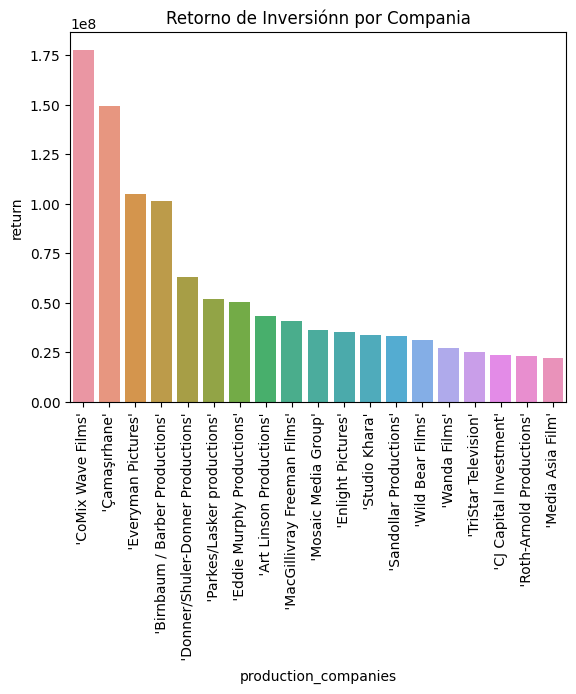

In [8]:
sns.barplot(x = companies_return.index, y='return', data=companies_return)
plt.title('Retorno de Inversiónn por Compania')
plt.xticks(rotation=90);

En cuanto a retorno por inversión encontramos que **CoMix Wave Films** y **Casmasirthane** obtuvieron mayor retorno por inversión en promedio 

## **Análisis por año**

In [25]:
anio_df = pd.DataFrame(movies_df['release_year'].value_counts())
anio_df


,count
release_year,
2014,1974
2015,1904
2013,1891
2012,1725
2011,1667
...,...
1878,1
2020,1
1893,1


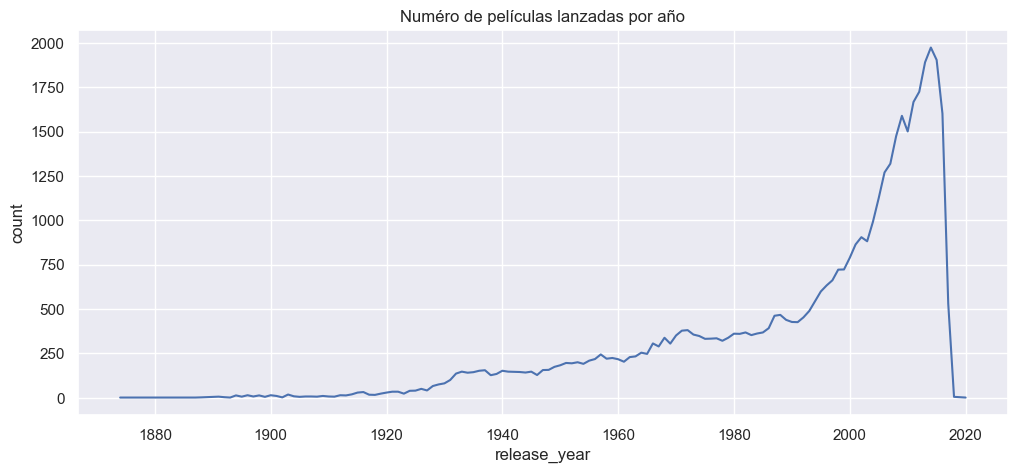

In [32]:
plt.figure(figsize=(12,5))
sns.set(style="darkgrid")
sns.lineplot(data=anio_df, x=anio_df.index, y=anio_df['count'])
plt.title('Numéro de películas lanzadas por año');

Se puede ver una tendencia exponencial creciente  en el número de películas que se lanzan por año desde 1880 al 2014

In [34]:
# Agruparemos por 'release_year' sobre el máximo con el fin de ver el tiempo máximo por película a lo largo de los años
anio_runtime_df = movies_df[['release_year','runtime']]
anio_runtime_df.groupby('release_year').max()
anio_runtime_df

,release_year,runtime
0,1995,81.0
1,1995,104.0
2,1995,101.0
3,1995,127.0
4,1995,106.0
...,...,...
45373,1974,76.0
45374,2014,103.0
45375,2016,94.0
45376,2003,98.0


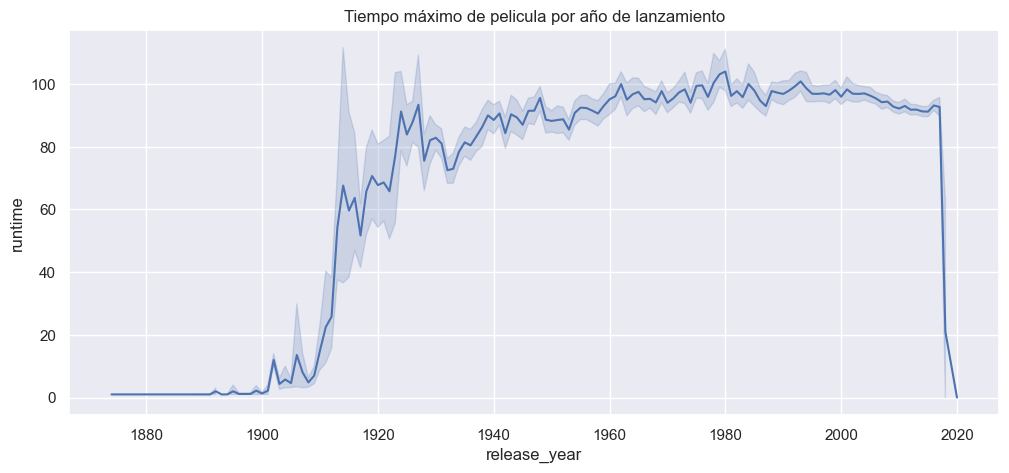

In [36]:
plt.figure(figsize=(12,5))
sns.set(style="darkgrid")
sns.lineplot(data=anio_runtime_df, x='release_year', y='runtime')
plt.title('Tiempo máximo de pelicula por año de lanzamiento');

Se puede ver un notable creciemito en la duración máxima de las películas de 1900 a 1920, porteriormente se observa una tendencia creciente mostrando un asentamiento en aproximadamente 100 minutos 

In [37]:
# Agruparemos por 'release_year' sobre el máximo con el fin de ver el tiempo máximo por película a lo largo de los años

anio_df = movies_df[['release_year','revenue','budget']]
anio_df['revenue_total'] = anio_df['revenue']-anio_df['budget']
anio_revenue_df = anio_df[['release_year','revenue_total']]
anio_revenue_df.groupby('release_year').sum()
anio_revenue_df

C:\Users\Asus\AppData\Local\Temp\ipykernel_3160\2849264834.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anio_df['revenue_total'] = anio_df['revenue']-anio_df['budget']


,release_year,revenue_total
0,1995,343554033.0
1,1995,197797249.0
2,1995,-1.0
3,1995,65452156.0
4,1995,76578910.0
...,...,...
45373,1974,-1.0
45374,2014,-1.0
45375,2016,-1.0
45376,2003,-1.0


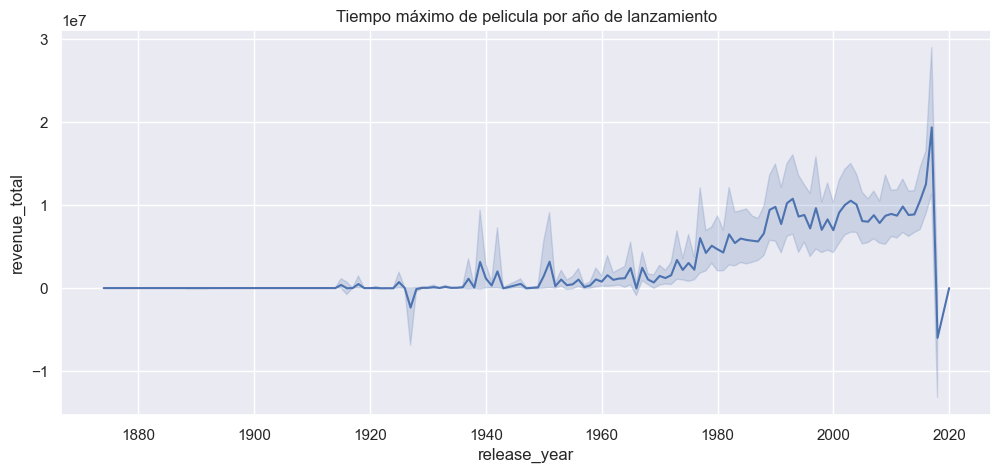

In [38]:
plt.figure(figsize=(12,5))
sns.set(style="darkgrid")
sns.lineplot(data=anio_revenue_df, x='release_year', y='revenue_total')
plt.title('Tiempo máximo de pelicula por año de lanzamiento');

También podemos apreciar el incremento en la recaudación 